# Маркетинговый анализ развлекательного приложения Procrastinate Pro+

* Не смотря на огромные вложения в рекламу приложения, последние несколько месяцев компания терпит убытки, необходимо разобраться в причинах такой ситуации. 

* В нашем распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. 

* Для выявления причин убытков изучим, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загружаем-данные-и-готовим-их-к-анализу" data-toc-modified-id="Загружаем-данные-и-готовим-их-к-анализу-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загружаем данные и готовим их к анализу</a></span><ul class="toc-item"><li><span><a href="#Загрузка-и-изучение-данных" data-toc-modified-id="Загрузка-и-изучение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка и изучение данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Подготовка данных</a></span></li></ul></li><li><span><a href="#Задаем-функции-для-расчета-и-анализа-LTV,-ROI,-удержания-и-конверсии" data-toc-modified-id="Задаем-функции-для-расчета-и-анализа-LTV,-ROI,-удержания-и-конверсии-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Задаем функции для расчета и анализа LTV, ROI, удержания и конверсии</a></span><ul class="toc-item"><li><span><a href="#Функция-для-создания-пользовательских-профилей-get_profiles()" data-toc-modified-id="Функция-для-создания-пользовательских-профилей-get_profiles()-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Функция для создания пользовательских профилей <code>get_profiles()</code></a></span></li><li><span><a href="#Функция-для-расчёта-удержания-get_retention()" data-toc-modified-id="Функция-для-расчёта-удержания-get_retention()-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Функция для расчёта удержания <code>get_retention()</code></a></span></li><li><span><a href="#Функция-для-расчёта-конверсии-get_conversion()" data-toc-modified-id="Функция-для-расчёта-конверсии-get_conversion()-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Функция для расчёта конверсии <code>get_conversion()</code></a></span></li><li><span><a href="#Функция-для-расчёта-LTV-и-ROI-get_ltv()" data-toc-modified-id="Функция-для-расчёта-LTV-и-ROI-get_ltv()-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Функция для расчёта LTV и ROI <code>get_ltv()</code></a></span></li><li><span><a href="#Функция-для-визуализации-LTV-и-ROI-plot_ltv_roi()" data-toc-modified-id="Функция-для-визуализации-LTV-и-ROI-plot_ltv_roi()-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Функция для визуализации LTV и ROI <code>plot_ltv_roi()</code></a></span></li><li><span><a href="#Функция-для-визуализации-удержания-plot_retention()" data-toc-modified-id="Функция-для-визуализации-удержания-plot_retention()-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Функция для визуализации удержания <code>plot_retention()</code></a></span></li><li><span><a href="#Функция-для-визуализации-конверсии-plot_conversion()" data-toc-modified-id="Функция-для-визуализации-конверсии-plot_conversion()-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Функция для визуализации конверсии <code>plot_conversion()</code></a></span></li><li><span><a href="#функция-для-сглаживания-фрейма-filter_data()" data-toc-modified-id="функция-для-сглаживания-фрейма-filter_data()-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>функция для сглаживания фрейма <code>filter_data()</code></a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Исследование-по-странам" data-toc-modified-id="Исследование-по-странам-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Исследование по странам</a></span></li><li><span><a href="#Исследование-по-устройствам" data-toc-modified-id="Исследование-по-устройствам-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Исследование по устройствам</a></span></li><li><span><a href="#Исследование-по-каналам-привлечения" data-toc-modified-id="Исследование-по-каналам-привлечения-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Исследование по каналам привлечения</a></span></li></ul></li><li><span><a href="#Маркетинг" data-toc-modified-id="Маркетинг-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Маркетинг</a></span><ul class="toc-item"><li><span><a href="#Затраты-на-рекламу" data-toc-modified-id="Затраты-на-рекламу-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Затраты на рекламу</a></span></li><li><span><a href="#Рассчёт-среднего--CAC-на-одного-пользователя-для-всего-проекта-и-для-каждого-источника-трафика" data-toc-modified-id="Рассчёт-среднего--CAC-на-одного-пользователя-для-всего-проекта-и-для-каждого-источника-трафика-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Рассчёт среднего  CAC на одного пользователя для всего проекта и для каждого источника трафика</a></span></li></ul></li><li><span><a href="#Оценка-окупаемости-рекламы-для-привлечения-пользователей" data-toc-modified-id="Оценка-окупаемости-рекламы-для-привлечения-пользователей-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Оценка окупаемости рекламы для привлечения пользователей</a></span><ul class="toc-item"><li><span><a href="#Анализ-общей-окупаемости-рекламы" data-toc-modified-id="Анализ-общей-окупаемости-рекламы-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Анализ общей окупаемости рекламы</a></span></li><li><span><a href="#Анализ-окупаемости-рекламы-с-разбивкой-по-устройствам" data-toc-modified-id="Анализ-окупаемости-рекламы-с-разбивкой-по-устройствам-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Анализ окупаемости рекламы с разбивкой по устройствам</a></span></li><li><span><a href="#Анализ-окупаемости-рекламы-с-разбивкой-по-странам" data-toc-modified-id="Анализ-окупаемости-рекламы-с-разбивкой-по-странам-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Анализ окупаемости рекламы с разбивкой по странам</a></span></li><li><span><a href="#Анализ-окупаемости-рекламы-с-разбивкой-по-рекламным-каналам" data-toc-modified-id="Анализ-окупаемости-рекламы-с-разбивкой-по-рекламным-каналам-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Анализ окупаемости рекламы с разбивкой по рекламным каналам</a></span></li><li><span><a href="#Изучиние-графиков-конверсии-и-удержания-с-разбивкой-по-устройствам,-странам,-рекламным-каналам" data-toc-modified-id="Изучиние-графиков-конверсии-и-удержания-с-разбивкой-по-устройствам,-странам,-рекламным-каналам-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Изучиние графиков конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам</a></span><ul class="toc-item"><li><span><a href="#Разбивка-по-устройствам" data-toc-modified-id="Разбивка-по-устройствам-5.5.1"><span class="toc-item-num">5.5.1&nbsp;&nbsp;</span>Разбивка по устройствам</a></span></li><li><span><a href="#Разбивка-по-странам" data-toc-modified-id="Разбивка-по-странам-5.5.2"><span class="toc-item-num">5.5.2&nbsp;&nbsp;</span>Разбивка по странам</a></span></li><li><span><a href="#Разбивка-по-рекламным-каналам" data-toc-modified-id="Разбивка-по-рекламным-каналам-5.5.3"><span class="toc-item-num">5.5.3&nbsp;&nbsp;</span>Разбивка по рекламным каналам</a></span></li></ul></li></ul></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Итоговый вывод</a></span></li></ul></div>

## Загружаем данные и готовим их к анализу

Импортируем необходимые библиотеки

In [2]:
import pandas as pd
import numpy  as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

### Загрузка и изучение данных

Читаем файлы и сохраняем в переменных

In [4]:
visits = pd.read_csv('visits_info_short.csv')  # журнал сессий
orders = pd.read_csv('orders_info_short.csv') # покупки
costs = pd.read_csv('costs_info_short.csv') # траты на рекламу

Получим информацию о данных

In [3]:
visits.sample(10, random_state=1)

,User Id,Region,Device,Channel,Session Start,Session End
211274,738535139711,UK,Android,organic,2019-05-09 15:06:53,2019-05-09 15:48:50
273259,680497695721,Germany,Android,LeapBob,2019-09-02 14:07:28,2019-09-02 14:11:43
205897,728963351414,United States,Mac,organic,2019-10-29 10:45:58,2019-10-29 10:47:25
297860,174899252198,UK,PC,LeapBob,2019-10-11 01:38:37,2019-10-11 01:47:59
169513,513791433815,United States,Android,TipTop,2019-10-02 15:05:58,2019-10-02 15:29:16
68421,332224842734,United States,PC,organic,2019-07-07 21:03:48,2019-07-07 21:35:22
53262,112607694631,United States,Mac,FaceBoom,2019-06-25 00:17:22,2019-06-25 00:52:21
27056,797073249411,United States,Android,organic,2019-05-28 09:38:35,2019-05-28 09:38:49
226350,531038849208,UK,Android,OppleCreativeMedia,2019-06-08 14:39:12,2019-06-08 15:17:15
279171,856315246559,UK,PC,OppleCreativeMedia,2019-09-14 04:52:55,2019-09-14 04:56:56


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


Таблица visits (лог сервера с информацией о посещениях сайта):

* User Id — уникальный идентификатор пользователя
* Device — категория устройства пользователя
* Session start — дата и время начала сессии
* Session End — дата и время окончания сессии
* Channel — идентификатор рекламного источника, из которого пришел пользователь
* Region - страна пользователя

In [5]:
orders.sample(10, random_state=1)

,User Id,Event Dt,Revenue
32012,419263491450,2019-07-30 23:59:07,4.99
38295,483568708610,2019-10-12 16:12:59,4.99
24544,448476047447,2019-10-16 06:11:23,4.99
29442,520659310653,2019-06-15 09:43:35,4.99
6270,680317225380,2019-07-05 13:01:50,4.99
11811,106927599817,2019-08-10 23:28:13,4.99
25721,854016361986,2019-10-21 21:52:12,4.99
12504,772315845552,2019-08-14 19:50:32,4.99
39984,662705152081,2019-10-29 13:53:48,4.99
13258,268123139092,2019-08-19 06:41:49,4.99


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


Таблица orders (информация о заказах):

* User Id — уникальный id пользователя, который сделал заказ
* Event Dt — дата и время покупки
* Revenue — выручка

In [7]:
costs.sample(10, random_state=1)

,dt,Channel,costs
1462,2019-05-23,WahooNetBanner,7.200
510,2019-09-28,RocketSuperAds,11.375
612,2019-07-12,TipTop,288.600
1322,2019-07-02,OppleCreativeMedia,14.750
993,2019-08-02,AdNonSense,26.250
190,2019-05-11,MediaTornado,11.520
1716,2019-08-05,lambdaMediaAds,4.000
1048,2019-09-26,AdNonSense,34.650
1407,2019-09-25,OppleCreativeMedia,16.500
881,2019-10-09,YRabbit,3.840


In [8]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Таблица costs (информация о затратах на маркетинг):

* Channel — идентификатор рекламного источника
* Dt — дата
* Costs — затраты на этот рекламный источник в этот день

**Вывод**

Пропуски в таблицах отсутствуют. В названиях колонок присутсвуют символы из верхнего регистра и пробелы, исправим это. Так же нужно изменить тип данных в колонках с датой и временем.

### Подготовка данных

Проверим данные на явные дубликаты

In [9]:
visits.duplicated().sum()

0

In [10]:
orders.duplicated().sum()

0

In [11]:
costs.duplicated().sum()

0

Приведем названия колонок к нижнему регистру и уберём пробелы

In [12]:
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns]
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns]
costs.columns = [x.lower().replace(' ', '_') for x in costs.columns]

Заменим тип данных в колонках с датой и временем

In [15]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

## Задаем функции для расчета и анализа LTV, ROI, удержания и конверсии

### Функция для создания пользовательских профилей `get_profiles()`

In [16]:
def get_profiles(sessions, orders, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    #for event in event_names:
        #if event in events['event_name'].unique():
            #profiles[event] = profiles['user_id'].isin(
                #events.query('event_name == @event')['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### Функция для расчёта удержания `get_retention()`

In [17]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### Функция для расчёта конверсии `get_conversion()`

In [18]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### Функция для расчёта LTV и ROI `get_ltv()`

In [19]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

### Функция для визуализации LTV и ROI `plot_ltv_roi()`

In [20]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Функция для визуализации удержания `plot_retention()`

In [21]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

### Функция для визуализации конверсии `plot_conversion()`

In [22]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### функция для сглаживания фрейма `filter_data()`

In [23]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

## Исследовательский анализ данных

Получим профили пользователейс помощью `get_profiles()`

In [24]:
profiles = get_profiles(visits, orders, costs)

Определим минимальную дату привлечения пользователей

In [25]:
profiles['dt'].min()

datetime.date(2019, 5, 1)

Определим максимальную дату привлечения

In [26]:
profiles['dt'].max()

datetime.date(2019, 10, 27)

### Исследование по странам

Выведем страны из которых приходят пользователи и посмотрим какие страны дают больше всего платящих пользователей, для этого посчитаем уникальное количество пользователей каждой страны и посчитаем процент платящих пользователей для каждой страны

In [27]:
country = profiles.groupby('region').agg({'user_id':'count', 'payer':'mean'}).reset_index().sort_values('payer', ascending=False)
country['payer'] = (country['payer'] * 100).round(2)
country

,region,user_id,payer
3,United States,100002,6.90
1,Germany,14981,4.11
2,UK,17575,3.98
0,France,17450,3.80


### Исследование по устройствам

Посчитаем уникальное количество пользователей каждого устройства и определим процент платящих пользователей дял каждого устройства

In [28]:
device = profiles.groupby('device').agg({'user_id':'count', 'payer':'mean'}).reset_index().sort_values('payer', ascending=False)
device['payer'] = (device['payer'] * 100).round(2)
device

,device,user_id,payer
1,Mac,30042,6.36
3,iPhone,54479,6.21
0,Android,35032,5.85
2,PC,30455,5.05


### Исследование по каналам привлечения

Посчитаем уникальное количество пользователей по каналам привлечения и определим процент платящих пользователей для каждого канала

In [29]:
channel = profiles.groupby('channel').agg({'user_id':'count', 'payer':'mean'}).reset_index().sort_values('payer', ascending=False)
channel['payer'] = (channel['payer'] * 100).round(2)
channel

,channel,user_id,payer
1,FaceBoom,29144,12.20
0,AdNonSense,3880,11.34
9,lambdaMediaAds,2149,10.47
6,TipTop,19561,9.60
5,RocketSuperAds,4448,7.91
7,WahooNetBanner,8553,5.30
8,YRabbit,4312,3.83
3,MediaTornado,4364,3.57
2,LeapBob,8553,3.06
4,OppleCreativeMedia,8605,2.71


**Вывод:**

* Чаще всего пользователи приходят из `United States`, колличество пользователей из штатов в разы превышает пользователей из других стран, пользователей из других стран примерно одинаковое колличество, процент платящих пользователей из штатов самый высокий, остальные страны особо не выделяются и процент платящих пользователей у них почти не отличается. 


* Всех лучше конвертируются в плятящих пользователи `Mac`, следом за ними с небольшим отрывом идут пользователи `iPhone` , при этом пользователей `iPhone` существенно больше, чем пользователей других устройств. Из пользователей привлеченных через канал `FaceBoom` 12,2 % становятся покупателями и это лучший результат среди всех каналов привлечения. Канал `FaceBoom` на втором месте по колличеству привлечённых пользователей, следом за ним идёт канал `TipTop`. Самым многочисленным по числу привлечённых пользователей и самым неплатёжным является канал `organic`, но пользователи этого канала являются "бесплатными" и в целом такое поведение оправдано.

## Маркетинг

### Затраты на рекламу 

Посчитаем сколько денег потрачено за всё время

In [30]:
all_costs = costs['costs'].sum().round(2)
all_costs

105497.3

Посчитаем сколько денег потрачено на каждый источник

In [31]:
costs_channel = costs.groupby('channel').agg({'costs':'sum'}).reset_index().sort_values('costs', ascending = False)
costs_channel

,channel,costs
6,TipTop,54751.30
1,FaceBoom,32445.60
7,WahooNetBanner,5151.00
0,AdNonSense,3911.25
4,OppleCreativeMedia,2151.25
5,RocketSuperAds,1833.00
2,LeapBob,1797.60
9,lambdaMediaAds,1557.60
3,MediaTornado,954.48
8,YRabbit,944.22


Построим график затрат на каждый источник привлечения во времени

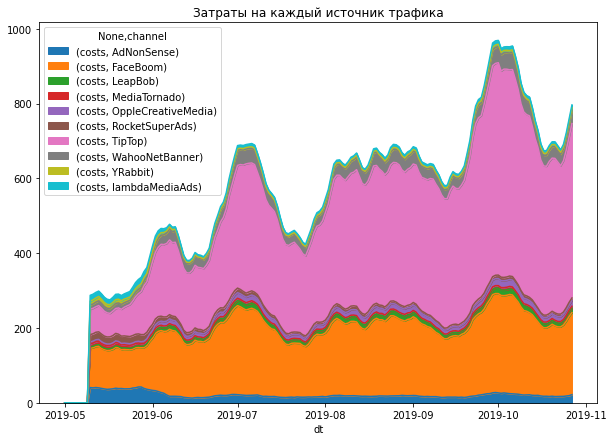

In [32]:
filter_data(costs.pivot_table(index='dt', columns= 'channel'), 10).plot.area(figsize=(10,7), 
                                                                             title = 'Затраты на каждый источник трафика');

### Рассчёт среднего  CAC на одного пользователя для всего проекта и для каждого источника трафика

Исключим органических пользователей из таблыцы с профилями

In [33]:
profiles = profiles[profiles['channel'] != 'organic']

Рассчёт среднего CAC на одного пользователя для всего проекта

In [34]:
cac_one_user = (all_costs/profiles['user_id'].count()).round(2)
cac_one_user

1.13

Рассчёт среднего CAC на одного пользователя для каждого источника трафика

In [35]:
cac_channel = costs_channel.merge(channel[['channel','user_id']],on = 'channel', how = 'inner')
cac_channel['cac'] = (cac_channel['costs']/cac_channel['user_id']).round(2)
cac_channel = cac_channel.sort_values('cac', ascending=False)
cac_channel

,channel,costs,user_id,cac
0,TipTop,54751.30,19561,2.80
1,FaceBoom,32445.60,29144,1.11
3,AdNonSense,3911.25,3880,1.01
7,lambdaMediaAds,1557.60,2149,0.72
2,WahooNetBanner,5151.00,8553,0.60
5,RocketSuperAds,1833.00,4448,0.41
4,OppleCreativeMedia,2151.25,8605,0.25
8,MediaTornado,954.48,4364,0.22
9,YRabbit,944.22,4312,0.22
6,LeapBob,1797.60,8553,0.21


**Вывод:** 

* Всего на маркетинг за исследуемый период потрачено приблизительно 105000, 80% этих средств потрачены на привлечение через каналы `TipTop` и`FaceBoom`, на графике видны временные промежутки в которые наращивались инвестиции, а так же наблюдается общая тенденция к росту вложений в эти каналы. 
* Самыми не популярными каналами для инвестиций являются `MediaTornado` и `YRabbit`. 
* Самая высокая средняя стоимость привлечения одного пользователя у канала `TipTop`, это может быть связанно с тем, что вложения в рекламу через этот канал увеличивались, но не приностили должного результата. В канал `FaceBoom` было вложено значительно меньше стредств чем в `TipTop`, при этом через канал `FaceBoom` было привлечено в 1.5 раза больше пользователей и стоимость привлечения одного клиента через канал `FaceBoom` меньше почти в 3 раза.

## Оценка окупаемости рекламы для привлечения пользователей

**Установим момент и горизонт анализа данных**

In [36]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

### Анализ общей окупаемости рекламы

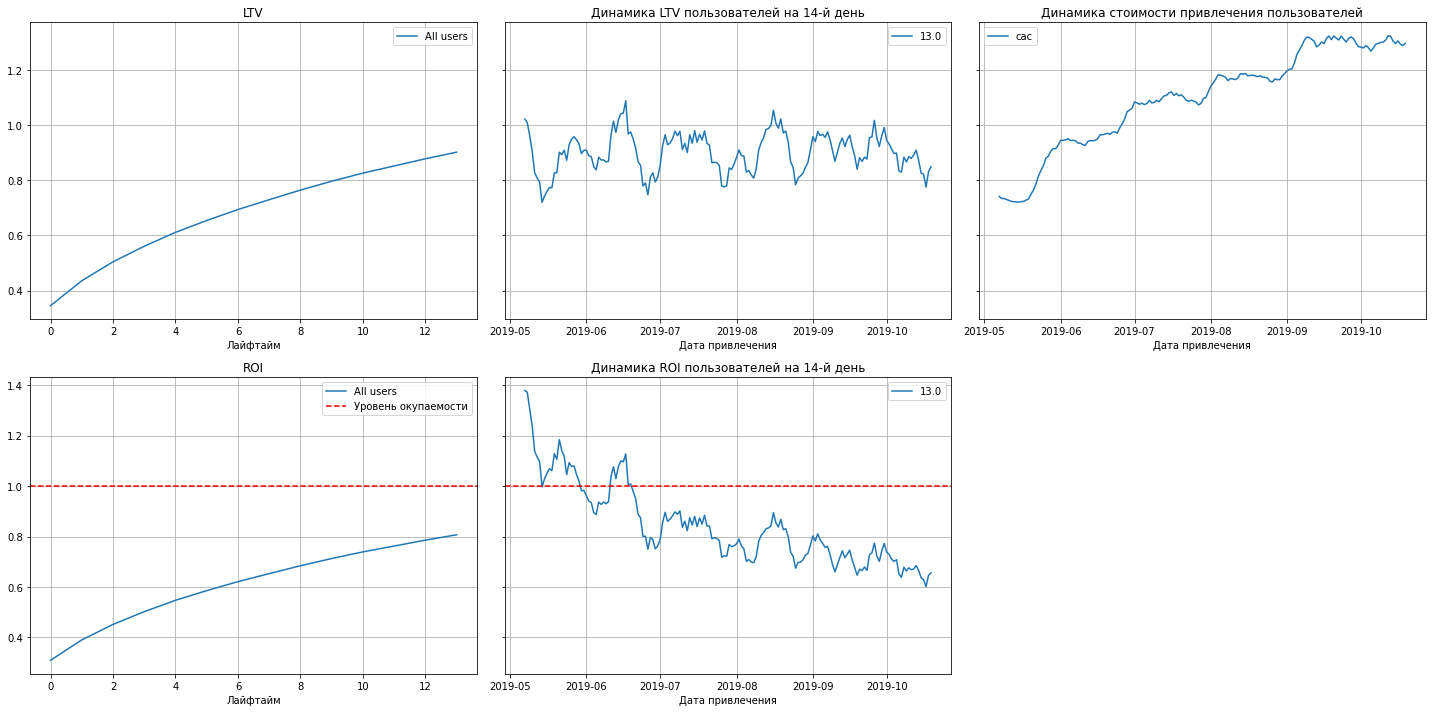

In [37]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Согласно бизнес плану пользователи должны окупаться не позднее чем через два недели, на графике ROI видно, что этого не происходит, при этом на графике динамики ROI видно, что показатель всегда снижается во времени. Показатель LTV немного колеблится во времени, но не имеет явной тенденции к снижению, на основе этого можем предположить, что дело не в качестве пользователей. Показатель CAC растет на всём временном промежутке, а это значит, что инвестиции в маргетинг постоянно увеличиваются.

### Анализ окупаемости рекламы с разбивкой по устройствам

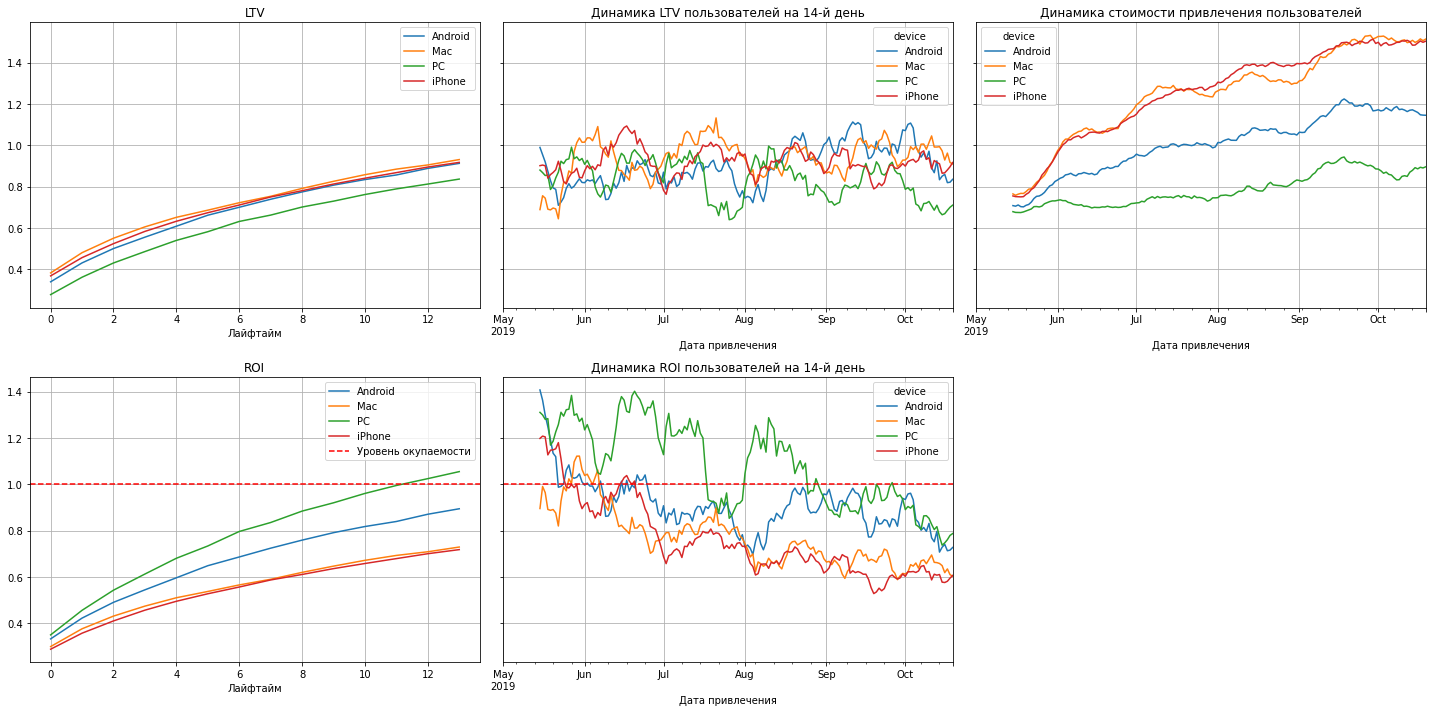

In [38]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions = ['device']
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=15) 

С разбивкой по устройствам всё не так плохо, но пользователи iPhone, Mac и PC все равно не окупаются. ROI пользователей снижается во времени. LTV в динамике выглядит не плохо и достаточно стабилен. Cтоимость привлечения пользователей снова растёт во времени.

### Анализ окупаемости рекламы с разбивкой по странам

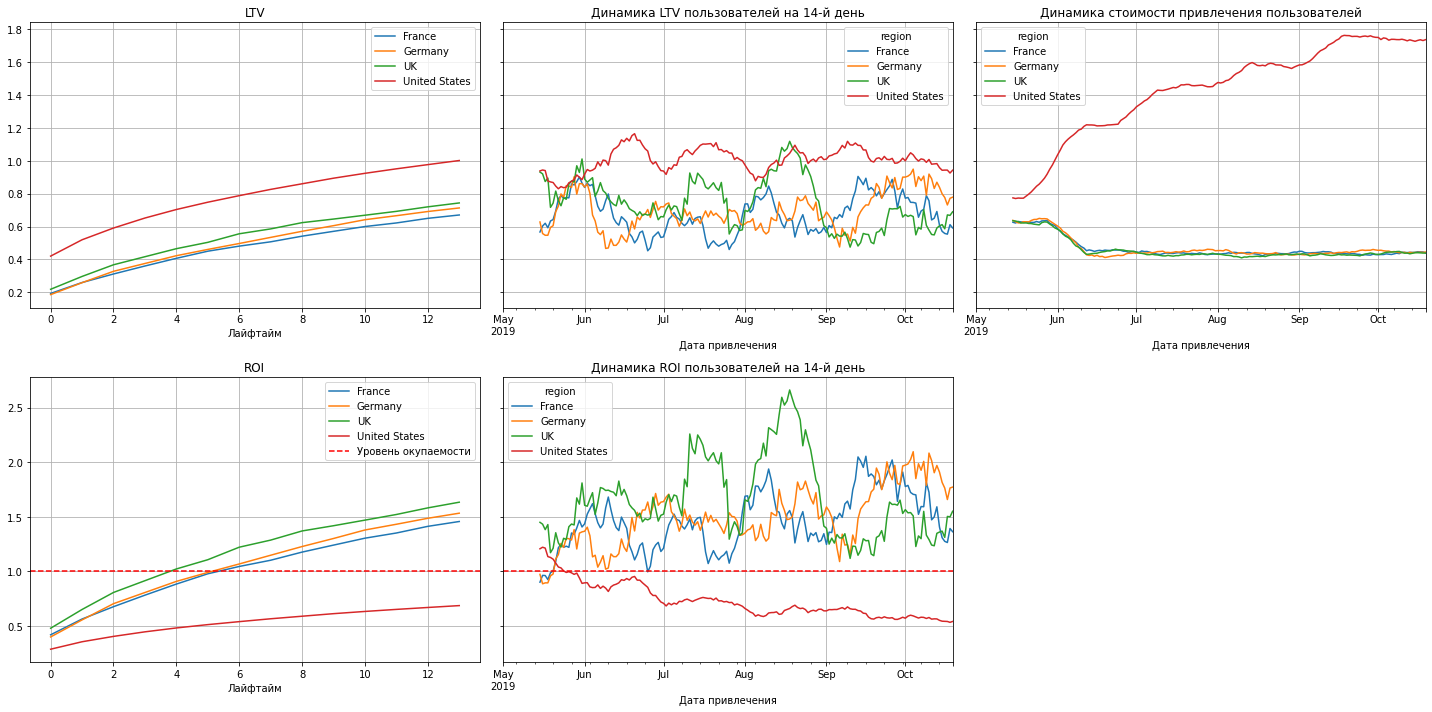

In [39]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions = ['region']
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=15) 

В разбивке по странам выделяется ROI `United States`, пользователи из этой страны не окупаются в отличии от остальных. На графике динамики ROI `United States` единственная страна в которой окупаемость стабильно снижается. LTV пользователей из `United States`, показывает себя лучше других стран, но стоимость привлечения пользователей из этой страны очень сильно растет, поэтому не смотря на качество пользователей они не окупаются.

### Анализ окупаемости рекламы с разбивкой по рекламным каналам

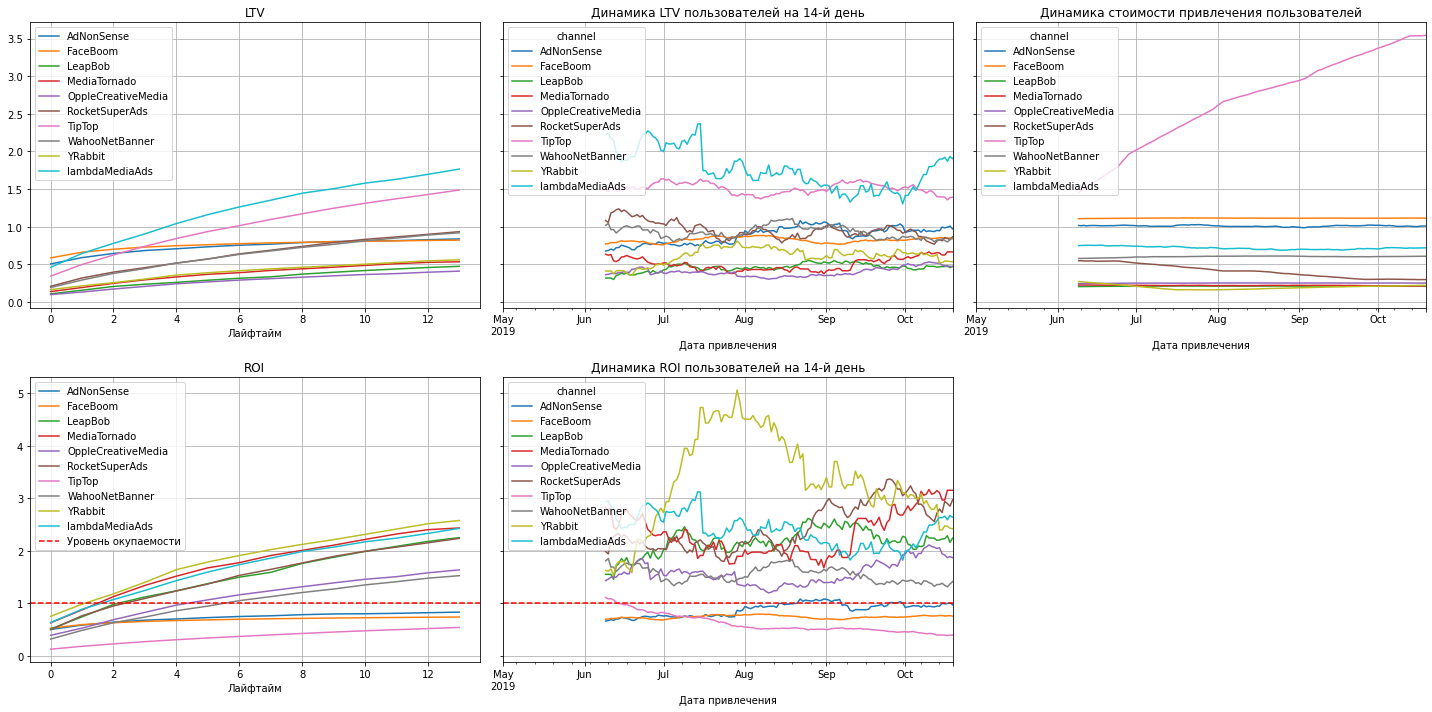

In [40]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions = ['channel']
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=40) 

Выведем уникальный список регионов с которыми работают каналы привлечения `TipTop` `FaceBoom` `AdNonSense`

In [41]:
profiles[profiles['channel']=='TipTop']['region'].unique()

array(['United States'], dtype=object)

In [42]:
profiles[profiles['channel']=='FaceBoom']['region'].unique()

array(['United States'], dtype=object)

In [43]:
profiles[profiles['channel']=='AdNonSense']['region'].unique()

array(['Germany', 'France', 'UK'], dtype=object)

На графике ROI видим, что в течении 14 дней не окупаются пользователи привлеченные через каналы `TipTop` `FaceBoom` `AdNonSense`. На графике динамики ROI эти же три канала на протяжении всего времени находятся в близи или ниже граници окупаемости. Стоимось привлечения пользователей через канал `TipTop` сильно растёт на протяжении всего времени. Получив уникальный список регионов с которыми работают каналы привлечения `TipTop` `FaceBoom` `AdNonSense` стало понятно, что проблема окупаемости `United States` скорее всего кроется в двух каналах `TipTop` и `FaceBoom`.

### Изучиние графиков конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам

#### Разбивка по устройствам

**Построим график конверсии с разбивкой по устройствам**

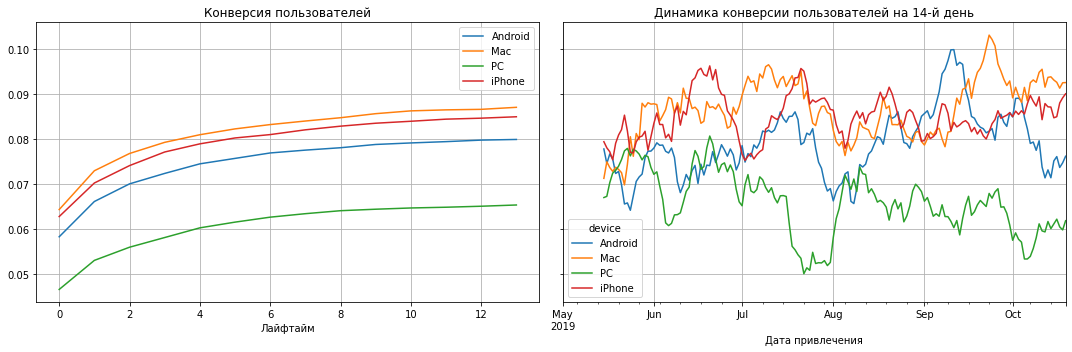

In [44]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days, 15) 

Пользователи Mac и iPhone конвертируются лучше всех, пользователи PC хуже всех.

**Построим график удержания с разбивкой по устройствам**

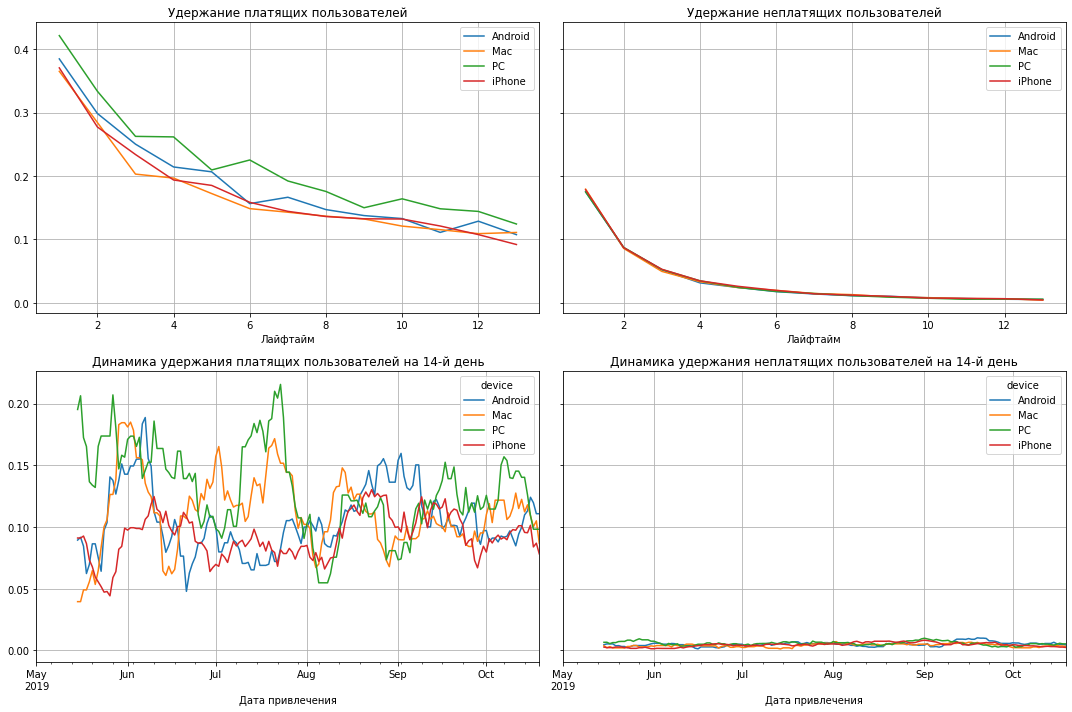

In [45]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days, 15) 

Удержание пользователей по разным устройствам практически не отличается.

#### Разбивка по странам

**Построим график конверсии с разбивкой по странам**

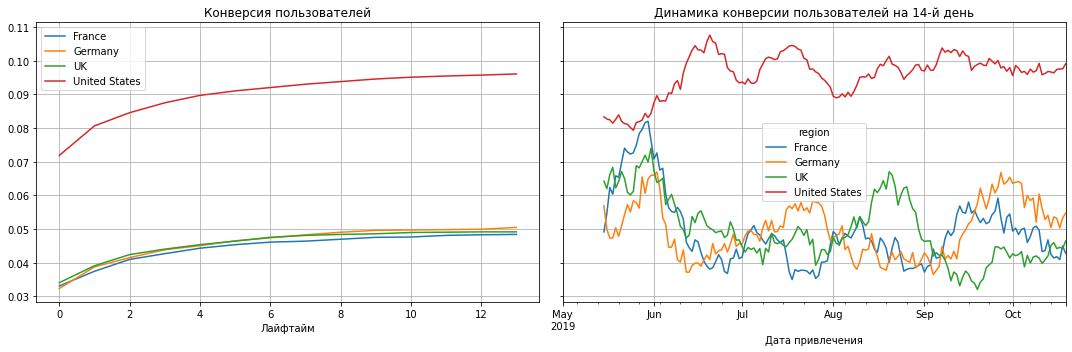

In [46]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days, 15) 

Пользователи из `United States` очень хорошо конвертируются на фоне других стран, на графике динамики конверсии заметна похожая тенденция.

**Построим график удержания с разбивкой по странам**

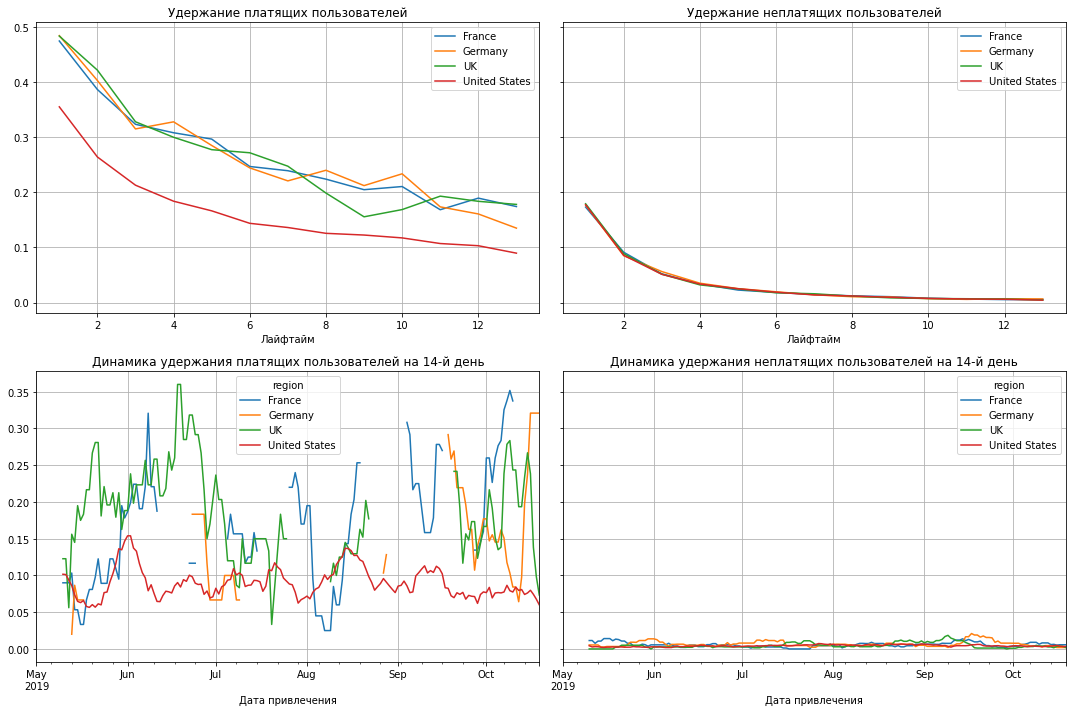

In [47]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days, 10)

При высокой конверсии с удержанием пользователей из `United States` есть проблемы.

#### Разбивка по рекламным каналам

**Построим график конверсии с разбивкой по рекламным каналам**

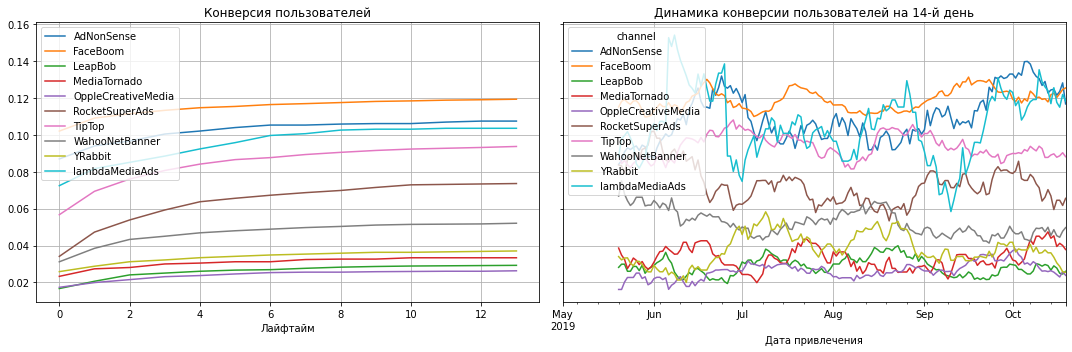

In [48]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days, 20) 

**Построим график удержания с разбивкой по рекламным каналам**

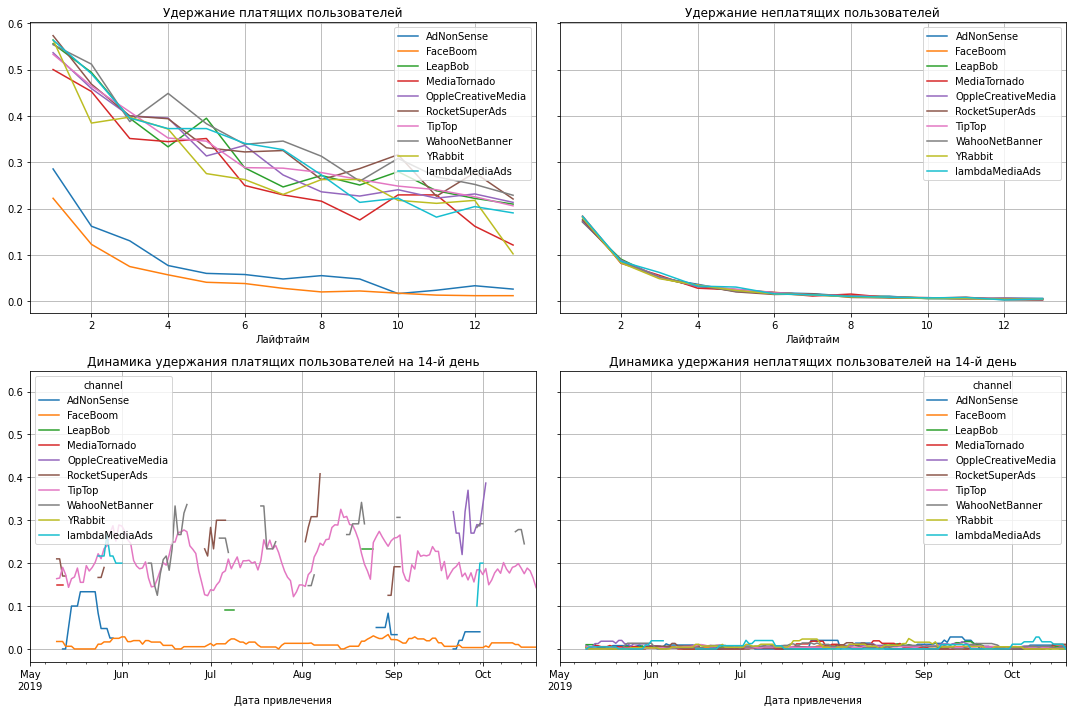

In [49]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days, 10) 

При высокой конверсии пользователи привлеченные по каналам `FaceBoom` и `AdNonSense` очень быстро "отваливаются".

**Вывод**

* Проведя анализ мы можем сказать, что реклама в целом не окупается, как и заявленно в проблеме. При разбивке по устройствам выявить проблему не удалось, а вот при разбивке по странам была выявлена страна `United States`, которая приносила убытки. 
* Стоимость привлечения пользователей из `United States` постоянно росла и происходило это из-за рекламного канала `TipTop`, проблема могла заключаться в неоправданном повышении тарифов. Показатели удержания пользователей из каналов `FaceBoom` и `AdNonSense` самые плохие, не смотря  на высокую конверсию в перую покупку, это может происходить по разным причинам, возможно пользователям этих каналов давали на перую покупку какой-то привлекательный промокод, после использования которого они прекращали пользоваться сервисом. Рекламному отделу стоит более подробно изучить условия работы с каналом `TipTop`, а так же поработать над маркетингом для пользователей привлекаемых через канал `FaceBoom` и `AdNonSense`.

## Итоговый вывод


* Больше всего пользователей приходит из `United States` и у этих пользователей самая большая конверсия, так же можно выделить первую тройку каналов привлечения по конверсии `FaceBoom` `AdNonSense` `lambdaMediaAds`. Всех больше инвестируют в рекламу через каналы `TipTop` `FaceBoom	`, на вложение в эти каналы уходит 80% бюджета. В канал `FaceBoom` было вложено сильно меньше средств чем в `TipTop`, при этом через канал `FaceBoom` было привлечено в 1.5 раза больше пользователей и стоимость привлечения одного клиента через канал `FaceBoom` меньше почти в 3 раза, поэтому `TipTop` является неоправданно дорогим. Было установленно, что пользователи из `United States` не окупаются на 14 день жизни и проблема скорее всего кроется в двух каналах `TipTop` и `FaceBoom`. При самой высокой конверсии пользователи привлеченные через каналы `FaceBoom` и `AdNonSense` всех хуже удерживаются и не окупаются. Возможно менеджеры выбирают канал привлечения по конверсии, при этом не анализируя окупаемость и удержание. В свою очередь, высокая конверсия может скрываться за неудачным выбором целевой аудитории, которую заманили промокодами или очень низкими ценами на первую покупку, после совершения которой они прекращают пользоваться сервисом.

* Отделу маркетинга стоит подробнее изучить условия сотрудничества с каналом `TipTop`, цена привлечения одного пользователя через этот канал слишком велика. Пользователи привлеченные через каналы `FaceBoom` и `AdNonSense` очень хорошо конвертируются, при этом почти сразу "отваливаются" и не успевают окупиться, поэтому нужно пересмотреть маркетинговую стратегию в их отношении.